In [9]:
from numpy.f2py.auxfuncs import throw_error
from skimage.feature import peak_local_max
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

1. Реализуйте высокочастотную фильтрацию на основе ядра Гаусса


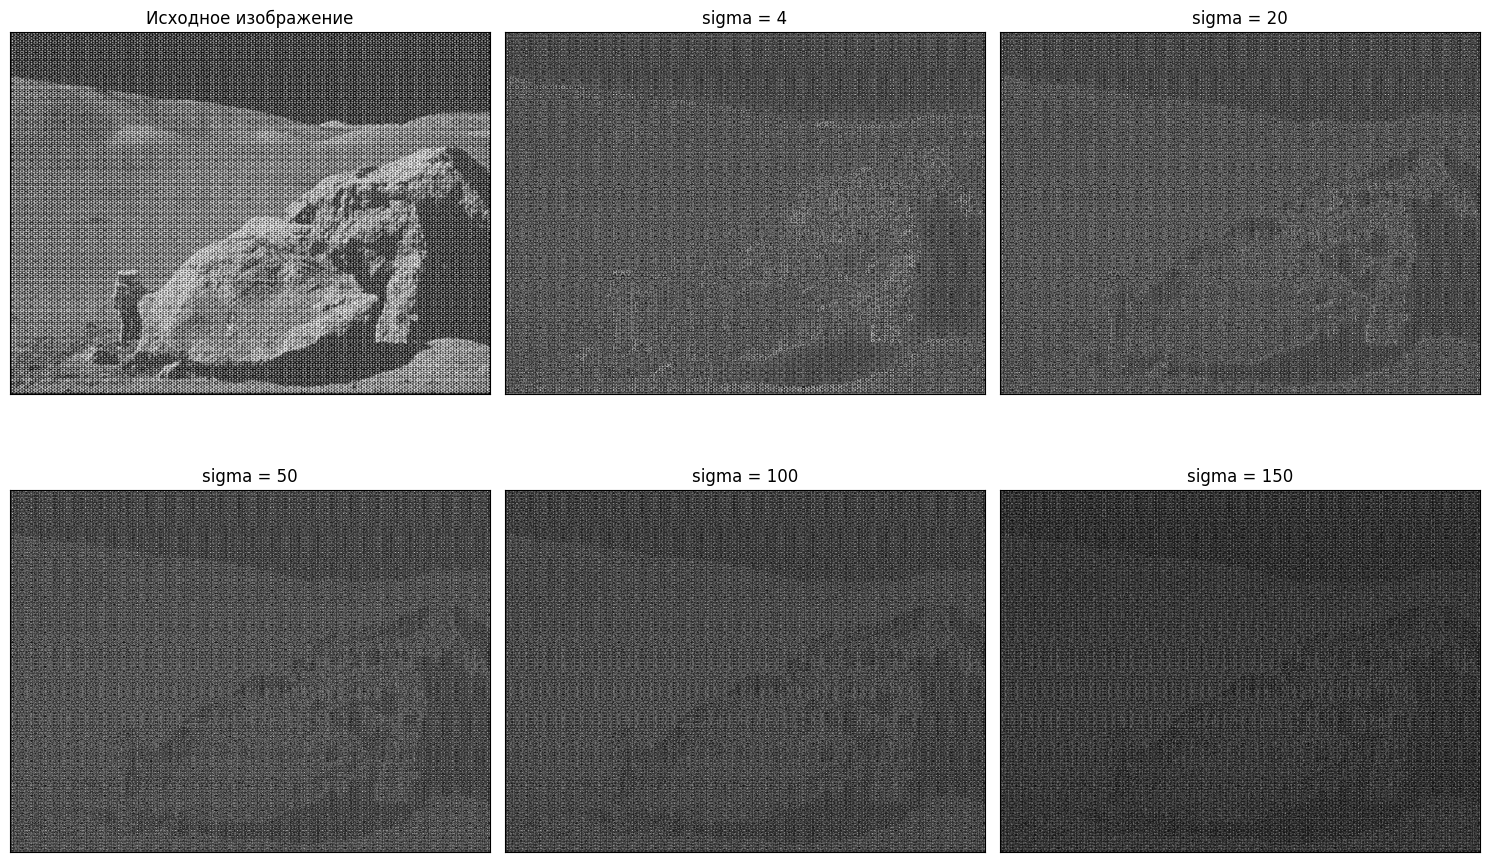

In [10]:
print("1. Реализуйте высокочастотную фильтрацию на основе ядра Гаусса")
img = cv.imread('../data/periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
if img is None:
    raise Exception("Изображение не найдено")

sigma_values = [4, 20, 50, 100, 150]

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
x, y = np.meshgrid(np.arange(0, cols, 1), np.arange(0, rows, 1))

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.xticks([])
plt.yticks([])

for id, sigma in enumerate(sigma_values):
    # Создаем гауссово ядро
    gaussian_lowpass = np.exp(-((x - (cols // 2))**2 + (y - (rows // 2))**2) / (2 * sigma**2))
    gaussian_highpass = 1 - gaussian_lowpass  # Инвертируем в высокочастотный фильтр

    dft_shift = dft_shift * gaussian_highpass[:, :, np.newaxis]

    f_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

    plt.subplot(2, 3, id + 2)
    plt.imshow(img_back, cmap='gray')
    plt.title(f'sigma = {sigma}')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

2. Реализуйте удаление периодического шума


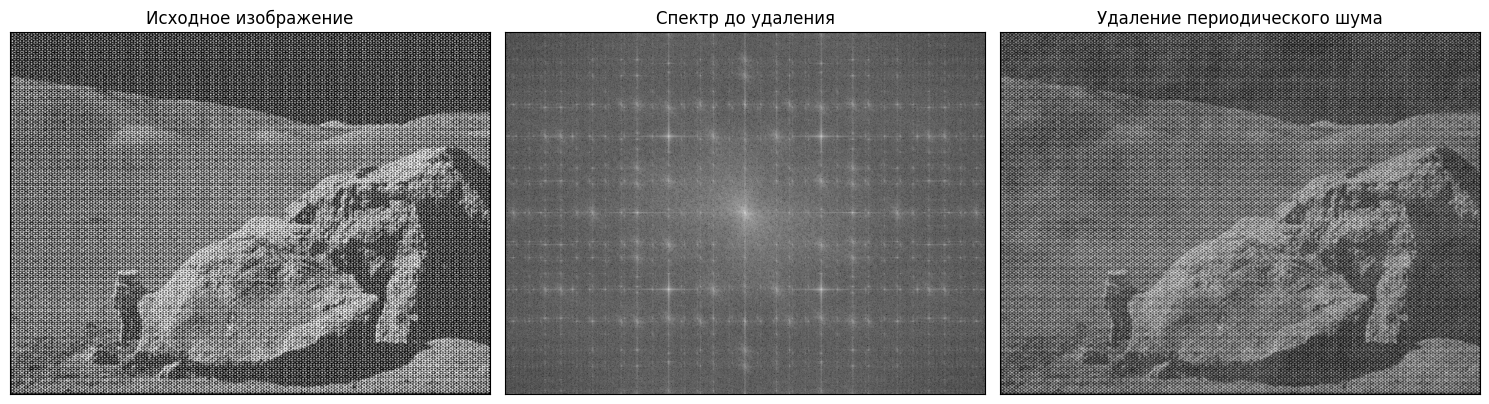

In [11]:
print("2. Реализуйте удаление периодического шума")

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
local_max = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=200)

rows, cols = img.shape
mask = np.copy(dft_shift)
mask[:, :, :] = 1

for i in local_max:
    r = np.int32(((i[0] - rows // 2) ** 2 + (i[1] - cols // 2) ** 2) ** (1 / 2))
    cv.circle(mask, (rows // 2, cols // 2), r, (0, 0))

dft_shift = dft_shift * mask

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Спектр до удаления')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(img_back, cmap='gray')
plt.title('Удаление периодического шума')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()